### Pre-Selection

In [1]:
import pandas as pd
import src.functions as src
import os 

features = "dataset1_features.csv"
features = pd.read_csv(features, sep=',', header=0, index_col=None)
Y = features[['labels']]

X_all = features.drop('labels', axis=1)
all_pre= ['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_','25_','26_','27_','28_','29_','30_','33_','34_']
X_all_pre=X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in all_pre)]]
all_post=  ['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_','19_','20_','21_','22_','23_','24_','31_','32_','35_','36_']
X_all_post=X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in all_post)]]
print('All Features:')
print('Total: ' + str(len(X_all.columns))) 
print('Pre: ' + str(len(X_all_pre.columns)))
print('Post: ' + str(len(X_all_post.columns)))

theta_prefixes= ['1_','2_','3_','4_','5_','6_','7_','8_','9_','10_','11_','12_','13_','14_','15_','16_','17_','18_']
X_theta= X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in theta_prefixes)]]
theta_pre= ['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_']
X_theta_pre= X_theta[[col for col in X_theta.columns if any(col.startswith(prefix) for prefix in theta_pre)]]
theta_post= ['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_']
X_theta_post= X_theta[[col for col in X_theta.columns if any(col.startswith(prefix) for prefix in theta_post)]]
print('Theta Features:')
print('Total: ' + str(len(X_theta.columns)))
print('Pre: ' + str(len(X_theta_pre.columns)))
print('Post: ' + str(len(X_theta_post.columns)))

frequency_prefixes= ['1_','2_','3_','4_','5_','6_','7_','8_','9_','10_','11_','12_','13_','14_','15_','16_','17_','18_','19_','20_','21_','22_','23_','24_','25_','26_','27_','28_','29_','30_']
X_frequency= X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in frequency_prefixes)]]
frequency_pre=['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_','25_','26_','27_','28_','29_','30_']
X_frequency_pre= X_frequency[[col for col in X_frequency.columns if any(col.startswith(prefix) for prefix in frequency_pre)]]
frequency_post=['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_','19_','20_','21_','22_','23_','24_']
X_frequency_post= X_frequency[[col for col in X_frequency.columns if any(col.startswith(prefix) for prefix in frequency_post)]]
print('Frequency Features:')
print('Total: ' + str(len(X_frequency.columns)))
print('Pre: ' + str(len(X_frequency_pre.columns)))
print('Post: ' + str(len(X_frequency_post.columns)))

temporal_prefixes= ['31_','32_','33_','34_','35_','36_']
X_temporal= X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in temporal_prefixes)]]
temporal_pre= ['33_','34_']
X_temporal_pre= X_temporal[[col for col in X_temporal.columns if any(col.startswith(prefix) for prefix in temporal_pre)]] 
temporal_post= ['31_','32_','35_','36_']
X_temporal_post= X_temporal[[col for col in X_temporal.columns if any(col.startswith(prefix) for prefix in temporal_post)]]
print('Temporal Features:')
print('Total: ' + str(len(X_temporal.columns)))
print('Pre: ' + str(len(X_temporal_pre.columns)))
print('Post: ' + str(len(X_temporal_post.columns)))

All Features:
Total: 1549
Pre: 804
Post: 806
Theta Features:
Total: 587
Pre: 324
Post: 324
Frequency Features:
Total: 1307
Pre: 684
Post: 684
Temporal Features:
Total: 242
Pre: 120
Post: 122


## Feature Selection Algorithm

In [ ]:
from sklearn.feature_selection import SelectKBest
params=src.grid_search(X_all,Y)
print(params)
selector= SelectKBest(k=40) #test_size=0.1
X_new= selector.fit_transform(X_all,Y)
X_new= X_all.columns[selector.get_support()].tolist()
test_size=0.05
while test_size<=0.5:
    print('Test_size: {:.2f}'.format(test_size))
    src.classification(len(X_new),X_all[X_new],Y, params,test_size)
    test_size+=0.05
print(X_new)
print('--------------------------------------------------------------------------------------------------------------------------')

from mrmr import mrmr_classif
X_new= mrmr_classif(X_all,Y,40)
test_size=0.05
while test_size<=0.5:
    print('Test_size: {:.2f}'.format(test_size))
    src.classification(len(X_new),X_all[X_new],Y, params,test_size)
    test_size+=0.05
print(X_new)
print('--------------------------------------------------------------------------------------------------------------------------')

X_new= src.camila_feat_selection(X_all,Y)
test_size=0.05
while test_size<=0.5:
    print('Test_size: {:.2f}'.format(test_size))
    src.classification(len(X_new),X_all[X_new],Y, params,test_size)
    test_size+=0.05
print(X_new)

## Training set

### Feature Selection

#### Theta Features

In [ ]:
best_params= {'kernel': 'rbf'}
n_feature, feature_df=src.best_n_features(X_theta,Y,best_params)
best_theta_features=feature_df.columns.tolist()
print(best_theta_features)
print(best_params)

if os.path.exists('best_theta_features1.txt'):
    os.remove('best_theta_features1.txt')
with open('best_theta_features1.txt', 'w') as file:
    file.write(', '.join(best_theta_features))
print("File created and list stored successfully.")

#### Frequency Features

In [ ]:
best_params= {'kernel': 'rbf'}
n_feature, feature_df=src.best_n_features(X_frequency,Y,best_params)
best_frequency_features=feature_df.columns.tolist()
print(best_frequency_features)
print(best_params)

if os.path.exists('best_frequency_features1.txt'):
    os.remove('best_frequency_features1.txt')
with open('best_frequency_features1.txt', 'w') as file:
    file.write(', '.join(best_frequency_features))
print("File created and list stored successfully.")

#### Temporal Features

In [ ]:
best_params= {'kernel': 'rbf'}
n_feature, feature_df=src.best_n_features(X_temporal,Y,best_params)
best_temporal_features=feature_df.columns.tolist()
print(best_temporal_features)
print(best_params)

if os.path.exists('best_temporal_features1.txt'):
    os.remove('best_temporal_features1.txt')
with open('best_temporal_features1.txt', 'w') as file:
    file.write(', '.join(best_temporal_features))
print("File created and list stored successfully.")

#### All Features

In [2]:
from importlib import reload
reload(src)

<module 'src.functions' from 'c:\\Users\\User\\Documents\\GitHub\\Tese\\src\\functions.py'>

100%|██████████| 30/30 [00:10<00:00,  2.83it/s]


Test size: 0.50
Number of features used: 30
Mean Sensitivity: 0.5618
Std Sensitivity: 0.0579
Mean Specificity: 0.7861
Std Specificity: 0.0263
Mean Balanced Accuracy: 0.6739
Std Balanced Accuracy: 0.0234
Mean R^2: -3.0108
Std R^2: 0.4006
Mean ROC AUC: 0.7199
Std ROC AUC: 0.0288
Test size: 0.45
Number of features used: 30
Mean Sensitivity: 0.5592
Std Sensitivity: 0.0461
Mean Specificity: 0.7888
Std Specificity: 0.0209
Mean Balanced Accuracy: 0.6740
Std Balanced Accuracy: 0.0207
Mean R^2: -2.9507
Std R^2: 0.3268
Mean ROC AUC: 0.7231
Std ROC AUC: 0.0261
Test size: 0.40
Number of features used: 30
Mean Sensitivity: 0.5579
Std Sensitivity: 0.0542
Mean Specificity: 0.7907
Std Specificity: 0.0253
Mean Balanced Accuracy: 0.6743
Std Balanced Accuracy: 0.0251
Mean R^2: -2.9496
Std R^2: 0.4010
Mean ROC AUC: 0.7249
Std ROC AUC: 0.0287
Test size: 0.35
Number of features used: 30
Mean Sensitivity: 0.5614
Std Sensitivity: 0.0597
Mean Specificity: 0.7883
Std Specificity: 0.0212
Mean Balanced Accuracy: 

100%|██████████| 31/31 [00:11<00:00,  2.68it/s]


Test size: 0.50
Number of features used: 31
Mean Sensitivity: 0.5608
Std Sensitivity: 0.0588
Mean Specificity: 0.7922
Std Specificity: 0.0285
Mean Balanced Accuracy: 0.6765
Std Balanced Accuracy: 0.0226
Mean R^2: -2.9109
Std R^2: 0.4328
Mean ROC AUC: 0.7147
Std ROC AUC: 0.0535
Test size: 0.45
Number of features used: 31
Mean Sensitivity: 0.5513
Std Sensitivity: 0.0478
Mean Specificity: 0.7991
Std Specificity: 0.0220
Mean Balanced Accuracy: 0.6752
Std Balanced Accuracy: 0.0217
Mean R^2: -2.7900
Std R^2: 0.3444
Mean ROC AUC: 0.7210
Std ROC AUC: 0.0268
Test size: 0.40
Number of features used: 31
Mean Sensitivity: 0.5548
Std Sensitivity: 0.0548
Mean Specificity: 0.7988
Std Specificity: 0.0249
Mean Balanced Accuracy: 0.6768
Std Balanced Accuracy: 0.0247
Mean R^2: -2.8194
Std R^2: 0.3916
Mean ROC AUC: 0.7239
Std ROC AUC: 0.0295
Test size: 0.35
Number of features used: 31
Mean Sensitivity: 0.5581
Std Sensitivity: 0.0631
Mean Specificity: 0.7990
Std Specificity: 0.0207
Mean Balanced Accuracy: 

100%|██████████| 32/32 [00:11<00:00,  2.84it/s]


Test size: 0.50
Number of features used: 32
Mean Sensitivity: 0.5614
Std Sensitivity: 0.0558
Mean Specificity: 0.7939
Std Specificity: 0.0283
Mean Balanced Accuracy: 0.6777
Std Balanced Accuracy: 0.0218
Mean R^2: -2.8816
Std R^2: 0.4327
Mean ROC AUC: 0.7175
Std ROC AUC: 0.0292
Test size: 0.45
Number of features used: 32
Mean Sensitivity: 0.5526
Std Sensitivity: 0.0493
Mean Specificity: 0.8002
Std Specificity: 0.0221
Mean Balanced Accuracy: 0.6764
Std Balanced Accuracy: 0.0227
Mean R^2: -2.7707
Std R^2: 0.3477
Mean ROC AUC: 0.7188
Std ROC AUC: 0.0268
Test size: 0.40
Number of features used: 32
Mean Sensitivity: 0.5584
Std Sensitivity: 0.0527
Mean Specificity: 0.7990
Std Specificity: 0.0247
Mean Balanced Accuracy: 0.6787
Std Balanced Accuracy: 0.0240
Mean R^2: -2.8124
Std R^2: 0.3917
Mean ROC AUC: 0.7225
Std ROC AUC: 0.0298
Test size: 0.35
Number of features used: 32
Mean Sensitivity: 0.5639
Std Sensitivity: 0.0628
Mean Specificity: 0.7998
Std Specificity: 0.0211
Mean Balanced Accuracy: 

100%|██████████| 33/33 [00:11<00:00,  2.89it/s]


Test size: 0.50
Number of features used: 33
Mean Sensitivity: 0.5581
Std Sensitivity: 0.0552
Mean Specificity: 0.7940
Std Specificity: 0.0278
Mean Balanced Accuracy: 0.6760
Std Balanced Accuracy: 0.0222
Mean R^2: -2.8842
Std R^2: 0.4279
Mean ROC AUC: 0.7155
Std ROC AUC: 0.0300
Test size: 0.45
Number of features used: 33
Mean Sensitivity: 0.5495
Std Sensitivity: 0.0502
Mean Specificity: 0.7994
Std Specificity: 0.0225
Mean Balanced Accuracy: 0.6744
Std Balanced Accuracy: 0.0235
Mean R^2: -2.7868
Std R^2: 0.3551
Mean ROC AUC: 0.7173
Std ROC AUC: 0.0272
Test size: 0.40
Number of features used: 33
Mean Sensitivity: 0.5558
Std Sensitivity: 0.0527
Mean Specificity: 0.7983
Std Specificity: 0.0243
Mean Balanced Accuracy: 0.6771
Std Balanced Accuracy: 0.0238
Mean R^2: -2.8266
Std R^2: 0.3833
Mean ROC AUC: 0.7205
Std ROC AUC: 0.0293
Test size: 0.35
Number of features used: 33
Mean Sensitivity: 0.5593
Std Sensitivity: 0.0629
Mean Specificity: 0.7988
Std Specificity: 0.0213
Mean Balanced Accuracy: 

100%|██████████| 34/34 [00:11<00:00,  2.88it/s]


Test size: 0.50
Number of features used: 34
Mean Sensitivity: 0.5590
Std Sensitivity: 0.0563
Mean Specificity: 0.7940
Std Specificity: 0.0282
Mean Balanced Accuracy: 0.6765
Std Balanced Accuracy: 0.0227
Mean R^2: -2.8826
Std R^2: 0.4348
Mean ROC AUC: 0.7168
Std ROC AUC: 0.0294
Test size: 0.45
Number of features used: 34
Mean Sensitivity: 0.5547
Std Sensitivity: 0.0525
Mean Specificity: 0.7993
Std Specificity: 0.0218
Mean Balanced Accuracy: 0.6770
Std Balanced Accuracy: 0.0239
Mean R^2: -2.7823
Std R^2: 0.3397
Mean ROC AUC: 0.7168
Std ROC AUC: 0.0282
Test size: 0.40
Number of features used: 34
Mean Sensitivity: 0.5555
Std Sensitivity: 0.0527
Mean Specificity: 0.7988
Std Specificity: 0.0236
Mean Balanced Accuracy: 0.6772
Std Balanced Accuracy: 0.0238
Mean R^2: -2.8175
Std R^2: 0.3719
Mean ROC AUC: 0.7204
Std ROC AUC: 0.0286
Test size: 0.35
Number of features used: 34
Mean Sensitivity: 0.5598
Std Sensitivity: 0.0637
Mean Specificity: 0.7983
Std Specificity: 0.0220
Mean Balanced Accuracy: 

100%|██████████| 35/35 [00:13<00:00,  2.60it/s]


Test size: 0.50
Number of features used: 35
Mean Sensitivity: 0.5555
Std Sensitivity: 0.0552
Mean Specificity: 0.7941
Std Specificity: 0.0289
Mean Balanced Accuracy: 0.6748
Std Balanced Accuracy: 0.0224
Mean R^2: -2.8855
Std R^2: 0.4464
Mean ROC AUC: 0.7137
Std ROC AUC: 0.0295
Test size: 0.45
Number of features used: 35
Mean Sensitivity: 0.5489
Std Sensitivity: 0.0509
Mean Specificity: 0.8007
Std Specificity: 0.0228
Mean Balanced Accuracy: 0.6748
Std Balanced Accuracy: 0.0231
Mean R^2: -2.7663
Std R^2: 0.3568
Mean ROC AUC: 0.7144
Std ROC AUC: 0.0291
Test size: 0.40
Number of features used: 35
Mean Sensitivity: 0.5543
Std Sensitivity: 0.0534
Mean Specificity: 0.7985
Std Specificity: 0.0241
Mean Balanced Accuracy: 0.6764
Std Balanced Accuracy: 0.0242
Mean R^2: -2.8242
Std R^2: 0.3803
Mean ROC AUC: 0.7183
Std ROC AUC: 0.0282
Test size: 0.35
Number of features used: 35
Mean Sensitivity: 0.5559
Std Sensitivity: 0.0624
Mean Specificity: 0.7978
Std Specificity: 0.0223
Mean Balanced Accuracy: 

100%|██████████| 36/36 [00:13<00:00,  2.59it/s]


Test size: 0.50
Number of features used: 36
Mean Sensitivity: 0.5557
Std Sensitivity: 0.0563
Mean Specificity: 0.7888
Std Specificity: 0.0289
Mean Balanced Accuracy: 0.6722
Std Balanced Accuracy: 0.0241
Mean R^2: -2.9733
Std R^2: 0.4508
Mean ROC AUC: 0.7083
Std ROC AUC: 0.0504
Test size: 0.45
Number of features used: 36
Mean Sensitivity: 0.5487
Std Sensitivity: 0.0481
Mean Specificity: 0.7949
Std Specificity: 0.0227
Mean Balanced Accuracy: 0.6718
Std Balanced Accuracy: 0.0218
Mean R^2: -2.8615
Std R^2: 0.3553
Mean ROC AUC: 0.7126
Std ROC AUC: 0.0284
Test size: 0.40
Number of features used: 36
Mean Sensitivity: 0.5572
Std Sensitivity: 0.0558
Mean Specificity: 0.7948
Std Specificity: 0.0241
Mean Balanced Accuracy: 0.6760
Std Balanced Accuracy: 0.0258
Mean R^2: -2.8833
Std R^2: 0.3818
Mean ROC AUC: 0.7175
Std ROC AUC: 0.0292
Test size: 0.35
Number of features used: 36
Mean Sensitivity: 0.5586
Std Sensitivity: 0.0636
Mean Specificity: 0.7945
Std Specificity: 0.0224
Mean Balanced Accuracy: 

100%|██████████| 37/37 [00:14<00:00,  2.63it/s]


Test size: 0.50
Number of features used: 37
Mean Sensitivity: 0.5521
Std Sensitivity: 0.0536
Mean Specificity: 0.7929
Std Specificity: 0.0303
Mean Balanced Accuracy: 0.6725
Std Balanced Accuracy: 0.0230
Mean R^2: -2.9082
Std R^2: 0.4751
Mean ROC AUC: 0.7123
Std ROC AUC: 0.0295
Test size: 0.45
Number of features used: 37
Mean Sensitivity: 0.5429
Std Sensitivity: 0.0513
Mean Specificity: 0.8010
Std Specificity: 0.0235
Mean Balanced Accuracy: 0.6719
Std Balanced Accuracy: 0.0241
Mean R^2: -2.7676
Std R^2: 0.3716
Mean ROC AUC: 0.7136
Std ROC AUC: 0.0297
Test size: 0.40
Number of features used: 37
Mean Sensitivity: 0.5504
Std Sensitivity: 0.0571
Mean Specificity: 0.7992
Std Specificity: 0.0248
Mean Balanced Accuracy: 0.6748
Std Balanced Accuracy: 0.0262
Mean R^2: -2.8162
Std R^2: 0.3927
Mean ROC AUC: 0.7181
Std ROC AUC: 0.0299
Test size: 0.35
Number of features used: 37
Mean Sensitivity: 0.5514
Std Sensitivity: 0.0632
Mean Specificity: 0.8009
Std Specificity: 0.0231
Mean Balanced Accuracy: 

100%|██████████| 38/38 [00:14<00:00,  2.62it/s]


Test size: 0.50
Number of features used: 38
Mean Sensitivity: 0.5604
Std Sensitivity: 0.0565
Mean Specificity: 0.7920
Std Specificity: 0.0275
Mean Balanced Accuracy: 0.6762
Std Balanced Accuracy: 0.0249
Mean R^2: -2.9144
Std R^2: 0.4309
Mean ROC AUC: 0.7119
Std ROC AUC: 0.0302
Test size: 0.45
Number of features used: 38
Mean Sensitivity: 0.5534
Std Sensitivity: 0.0507
Mean Specificity: 0.8000
Std Specificity: 0.0201
Mean Balanced Accuracy: 0.6767
Std Balanced Accuracy: 0.0240
Mean R^2: -2.7724
Std R^2: 0.3180
Mean ROC AUC: 0.7135
Std ROC AUC: 0.0287
Test size: 0.40
Number of features used: 38
Mean Sensitivity: 0.5622
Std Sensitivity: 0.0601
Mean Specificity: 0.7988
Std Specificity: 0.0247
Mean Balanced Accuracy: 0.6805
Std Balanced Accuracy: 0.0267
Mean R^2: -2.8107
Std R^2: 0.3846
Mean ROC AUC: 0.7182
Std ROC AUC: 0.0306
Test size: 0.35
Number of features used: 38
Mean Sensitivity: 0.5629
Std Sensitivity: 0.0619
Mean Specificity: 0.8016
Std Specificity: 0.0216
Mean Balanced Accuracy: 

100%|██████████| 39/39 [00:14<00:00,  2.62it/s]


Test size: 0.50
Number of features used: 39
Mean Sensitivity: 0.5567
Std Sensitivity: 0.0559
Mean Specificity: 0.7927
Std Specificity: 0.0280
Mean Balanced Accuracy: 0.6747
Std Balanced Accuracy: 0.0249
Mean R^2: -2.9077
Std R^2: 0.4399
Mean ROC AUC: 0.7104
Std ROC AUC: 0.0302
Test size: 0.45
Number of features used: 39
Mean Sensitivity: 0.5541
Std Sensitivity: 0.0497
Mean Specificity: 0.8003
Std Specificity: 0.0202
Mean Balanced Accuracy: 0.6772
Std Balanced Accuracy: 0.0239
Mean R^2: -2.7672
Std R^2: 0.3216
Mean ROC AUC: 0.7124
Std ROC AUC: 0.0285
Test size: 0.40
Number of features used: 39
Mean Sensitivity: 0.5593
Std Sensitivity: 0.0596
Mean Specificity: 0.7983
Std Specificity: 0.0253
Mean Balanced Accuracy: 0.6788
Std Balanced Accuracy: 0.0274
Mean R^2: -2.8220
Std R^2: 0.3992
Mean ROC AUC: 0.7166
Std ROC AUC: 0.0317
Test size: 0.35
Number of features used: 39
Mean Sensitivity: 0.5615
Std Sensitivity: 0.0614
Mean Specificity: 0.8012
Std Specificity: 0.0218
Mean Balanced Accuracy: 

100%|██████████| 40/40 [00:14<00:00,  2.67it/s]


Test size: 0.50
Number of features used: 40
Mean Sensitivity: 0.5561
Std Sensitivity: 0.0550
Mean Specificity: 0.7925
Std Specificity: 0.0266
Mean Balanced Accuracy: 0.6743
Std Balanced Accuracy: 0.0239
Mean R^2: -2.9113
Std R^2: 0.4147
Mean ROC AUC: 0.7098
Std ROC AUC: 0.0298
Test size: 0.45
Number of features used: 40
Mean Sensitivity: 0.5546
Std Sensitivity: 0.0479
Mean Specificity: 0.7997
Std Specificity: 0.0209
Mean Balanced Accuracy: 0.6772
Std Balanced Accuracy: 0.0229
Mean R^2: -2.7759
Std R^2: 0.3322
Mean ROC AUC: 0.7131
Std ROC AUC: 0.0286
Test size: 0.40
Number of features used: 40
Mean Sensitivity: 0.5591
Std Sensitivity: 0.0593
Mean Specificity: 0.7969
Std Specificity: 0.0252
Mean Balanced Accuracy: 0.6780
Std Balanced Accuracy: 0.0273
Mean R^2: -2.8456
Std R^2: 0.3982
Mean ROC AUC: 0.7166
Std ROC AUC: 0.0312
Test size: 0.35
Number of features used: 40
Mean Sensitivity: 0.5631
Std Sensitivity: 0.0606
Mean Specificity: 0.8000
Std Specificity: 0.0215
Mean Balanced Accuracy: 

100%|██████████| 41/41 [00:15<00:00,  2.66it/s]


Test size: 0.50
Number of features used: 41
Mean Sensitivity: 0.5558
Std Sensitivity: 0.0557
Mean Specificity: 0.7903
Std Specificity: 0.0275
Mean Balanced Accuracy: 0.6731
Std Balanced Accuracy: 0.0245
Mean R^2: -2.9474
Std R^2: 0.4309
Mean ROC AUC: 0.7098
Std ROC AUC: 0.0303
Test size: 0.45
Number of features used: 41
Mean Sensitivity: 0.5557
Std Sensitivity: 0.0493
Mean Specificity: 0.7972
Std Specificity: 0.0218
Mean Balanced Accuracy: 0.6764
Std Balanced Accuracy: 0.0230
Mean R^2: -2.8169
Std R^2: 0.3434
Mean ROC AUC: 0.7117
Std ROC AUC: 0.0280
Test size: 0.40
Number of features used: 41
Mean Sensitivity: 0.5594
Std Sensitivity: 0.0605
Mean Specificity: 0.7958
Std Specificity: 0.0252
Mean Balanced Accuracy: 0.6776
Std Balanced Accuracy: 0.0278
Mean R^2: -2.8634
Std R^2: 0.3988
Mean ROC AUC: 0.7163
Std ROC AUC: 0.0324
Test size: 0.35
Number of features used: 41
Mean Sensitivity: 0.5619
Std Sensitivity: 0.0575
Mean Specificity: 0.7988
Std Specificity: 0.0216
Mean Balanced Accuracy: 

100%|██████████| 42/42 [00:15<00:00,  2.67it/s]


Test size: 0.50
Number of features used: 42
Mean Sensitivity: 0.5518
Std Sensitivity: 0.0592
Mean Specificity: 0.7915
Std Specificity: 0.0275
Mean Balanced Accuracy: 0.6717
Std Balanced Accuracy: 0.0255
Mean R^2: -2.9317
Std R^2: 0.4270
Mean ROC AUC: 0.7075
Std ROC AUC: 0.0307
Test size: 0.45
Number of features used: 42
Mean Sensitivity: 0.5517
Std Sensitivity: 0.0494
Mean Specificity: 0.7968
Std Specificity: 0.0223
Mean Balanced Accuracy: 0.6742
Std Balanced Accuracy: 0.0229
Mean R^2: -2.8277
Std R^2: 0.3519
Mean ROC AUC: 0.7092
Std ROC AUC: 0.0299
Test size: 0.40
Number of features used: 42
Mean Sensitivity: 0.5551
Std Sensitivity: 0.0594
Mean Specificity: 0.7958
Std Specificity: 0.0254
Mean Balanced Accuracy: 0.6754
Std Balanced Accuracy: 0.0271
Mean R^2: -2.8683
Std R^2: 0.4008
Mean ROC AUC: 0.7137
Std ROC AUC: 0.0326
Test size: 0.35
Number of features used: 42
Mean Sensitivity: 0.5576
Std Sensitivity: 0.0617
Mean Specificity: 0.7995
Std Specificity: 0.0218
Mean Balanced Accuracy: 

100%|██████████| 43/43 [00:16<00:00,  2.66it/s]


Test size: 0.50
Number of features used: 43
Mean Sensitivity: 0.5513
Std Sensitivity: 0.0586
Mean Specificity: 0.7921
Std Specificity: 0.0265
Mean Balanced Accuracy: 0.6717
Std Balanced Accuracy: 0.0252
Mean R^2: -2.9222
Std R^2: 0.4108
Mean ROC AUC: 0.7055
Std ROC AUC: 0.0307
Test size: 0.45
Number of features used: 43
Mean Sensitivity: 0.5533
Std Sensitivity: 0.0508
Mean Specificity: 0.7971
Std Specificity: 0.0214
Mean Balanced Accuracy: 0.6752
Std Balanced Accuracy: 0.0236
Mean R^2: -2.8210
Std R^2: 0.3364
Mean ROC AUC: 0.7068
Std ROC AUC: 0.0302
Test size: 0.40
Number of features used: 43
Mean Sensitivity: 0.5588
Std Sensitivity: 0.0575
Mean Specificity: 0.7961
Std Specificity: 0.0239
Mean Balanced Accuracy: 0.6775
Std Balanced Accuracy: 0.0267
Mean R^2: -2.8596
Std R^2: 0.3785
Mean ROC AUC: 0.7141
Std ROC AUC: 0.0330
Test size: 0.35
Number of features used: 43
Mean Sensitivity: 0.5593
Std Sensitivity: 0.0604
Mean Specificity: 0.7997
Std Specificity: 0.0203
Mean Balanced Accuracy: 

100%|██████████| 44/44 [00:16<00:00,  2.68it/s]


Test size: 0.50
Number of features used: 44
Mean Sensitivity: 0.5529
Std Sensitivity: 0.0570
Mean Specificity: 0.7885
Std Specificity: 0.0266
Mean Balanced Accuracy: 0.6707
Std Balanced Accuracy: 0.0239
Mean R^2: -2.9807
Std R^2: 0.4109
Mean ROC AUC: 0.7053
Std ROC AUC: 0.0307
Test size: 0.45
Number of features used: 44
Mean Sensitivity: 0.5495
Std Sensitivity: 0.0527
Mean Specificity: 0.7927
Std Specificity: 0.0220
Mean Balanced Accuracy: 0.6711
Std Balanced Accuracy: 0.0246
Mean R^2: -2.8972
Std R^2: 0.3457
Mean ROC AUC: 0.7047
Std ROC AUC: 0.0300
Test size: 0.40
Number of features used: 44
Mean Sensitivity: 0.5603
Std Sensitivity: 0.0595
Mean Specificity: 0.7939
Std Specificity: 0.0261
Mean Balanced Accuracy: 0.6771
Std Balanced Accuracy: 0.0279
Mean R^2: -2.8942
Std R^2: 0.4152
Mean ROC AUC: 0.7128
Std ROC AUC: 0.0339
Test size: 0.35
Number of features used: 44
Mean Sensitivity: 0.5620
Std Sensitivity: 0.0591
Mean Specificity: 0.7958
Std Specificity: 0.0202
Mean Balanced Accuracy: 

100%|██████████| 45/45 [00:16<00:00,  2.67it/s]


Test size: 0.50
Number of features used: 45
Mean Sensitivity: 0.5501
Std Sensitivity: 0.0577
Mean Specificity: 0.7875
Std Specificity: 0.0273
Mean Balanced Accuracy: 0.6688
Std Balanced Accuracy: 0.0246
Mean R^2: -2.9997
Std R^2: 0.4232
Mean ROC AUC: 0.7031
Std ROC AUC: 0.0306
Test size: 0.45
Number of features used: 45
Mean Sensitivity: 0.5458
Std Sensitivity: 0.0521
Mean Specificity: 0.7922
Std Specificity: 0.0220
Mean Balanced Accuracy: 0.6690
Std Balanced Accuracy: 0.0246
Mean R^2: -2.9101
Std R^2: 0.3483
Mean ROC AUC: 0.7013
Std ROC AUC: 0.0310
Test size: 0.40
Number of features used: 45
Mean Sensitivity: 0.5570
Std Sensitivity: 0.0591
Mean Specificity: 0.7932
Std Specificity: 0.0263
Mean Balanced Accuracy: 0.6751
Std Balanced Accuracy: 0.0280
Mean R^2: -2.9104
Std R^2: 0.4197
Mean ROC AUC: 0.7094
Std ROC AUC: 0.0334
Test size: 0.35
Number of features used: 45
Mean Sensitivity: 0.5576
Std Sensitivity: 0.0598
Mean Specificity: 0.7954
Std Specificity: 0.0206
Mean Balanced Accuracy: 

100%|██████████| 46/46 [00:17<00:00,  2.69it/s]


Test size: 0.50
Number of features used: 46
Mean Sensitivity: 0.5490
Std Sensitivity: 0.0582
Mean Specificity: 0.7886
Std Specificity: 0.0278
Mean Balanced Accuracy: 0.6688
Std Balanced Accuracy: 0.0248
Mean R^2: -2.9834
Std R^2: 0.4320
Mean ROC AUC: 0.7020
Std ROC AUC: 0.0306
Test size: 0.45
Number of features used: 46
Mean Sensitivity: 0.5414
Std Sensitivity: 0.0527
Mean Specificity: 0.7933
Std Specificity: 0.0224
Mean Balanced Accuracy: 0.6674
Std Balanced Accuracy: 0.0245
Mean R^2: -2.8953
Std R^2: 0.3524
Mean ROC AUC: 0.7003
Std ROC AUC: 0.0301
Test size: 0.40
Number of features used: 46
Mean Sensitivity: 0.5525
Std Sensitivity: 0.0560
Mean Specificity: 0.7941
Std Specificity: 0.0256
Mean Balanced Accuracy: 0.6733
Std Balanced Accuracy: 0.0264
Mean R^2: -2.8996
Std R^2: 0.4080
Mean ROC AUC: 0.7078
Std ROC AUC: 0.0329
Test size: 0.35
Number of features used: 46
Mean Sensitivity: 0.5525
Std Sensitivity: 0.0624
Mean Specificity: 0.7967
Std Specificity: 0.0200
Mean Balanced Accuracy: 

100%|██████████| 47/47 [00:17<00:00,  2.67it/s]


Test size: 0.50
Number of features used: 47
Mean Sensitivity: 0.5474
Std Sensitivity: 0.0585
Mean Specificity: 0.7873
Std Specificity: 0.0275
Mean Balanced Accuracy: 0.6674
Std Balanced Accuracy: 0.0241
Mean R^2: -3.0059
Std R^2: 0.4235
Mean ROC AUC: 0.6997
Std ROC AUC: 0.0311
Test size: 0.45
Number of features used: 47
Mean Sensitivity: 0.5392
Std Sensitivity: 0.0500
Mean Specificity: 0.7922
Std Specificity: 0.0227
Mean Balanced Accuracy: 0.6657
Std Balanced Accuracy: 0.0242
Mean R^2: -2.9164
Std R^2: 0.3624
Mean ROC AUC: 0.6977
Std ROC AUC: 0.0303
Test size: 0.40
Number of features used: 47
Mean Sensitivity: 0.5537
Std Sensitivity: 0.0534
Mean Specificity: 0.7928
Std Specificity: 0.0254
Mean Balanced Accuracy: 0.6733
Std Balanced Accuracy: 0.0253
Mean R^2: -2.9203
Std R^2: 0.4059
Mean ROC AUC: 0.7059
Std ROC AUC: 0.0332
Test size: 0.35
Number of features used: 47
Mean Sensitivity: 0.5488
Std Sensitivity: 0.0615
Mean Specificity: 0.7968
Std Specificity: 0.0203
Mean Balanced Accuracy: 

100%|██████████| 48/48 [00:18<00:00,  2.66it/s]


Test size: 0.50
Number of features used: 48
Mean Sensitivity: 0.5438
Std Sensitivity: 0.0582
Mean Specificity: 0.7864
Std Specificity: 0.0276
Mean Balanced Accuracy: 0.6651
Std Balanced Accuracy: 0.0247
Mean R^2: -3.0247
Std R^2: 0.4273
Mean ROC AUC: 0.6977
Std ROC AUC: 0.0309
Test size: 0.45
Number of features used: 48
Mean Sensitivity: 0.5386
Std Sensitivity: 0.0529
Mean Specificity: 0.7910
Std Specificity: 0.0225
Mean Balanced Accuracy: 0.6648
Std Balanced Accuracy: 0.0249
Mean R^2: -2.9377
Std R^2: 0.3558
Mean ROC AUC: 0.6954
Std ROC AUC: 0.0300
Test size: 0.40
Number of features used: 48
Mean Sensitivity: 0.5507
Std Sensitivity: 0.0550
Mean Specificity: 0.7925
Std Specificity: 0.0255
Mean Balanced Accuracy: 0.6716
Std Balanced Accuracy: 0.0257
Mean R^2: -2.9288
Std R^2: 0.4065
Mean ROC AUC: 0.6994
Std ROC AUC: 0.0565
Test size: 0.35
Number of features used: 48
Mean Sensitivity: 0.5473
Std Sensitivity: 0.0643
Mean Specificity: 0.7956
Std Specificity: 0.0211
Mean Balanced Accuracy: 

100%|██████████| 49/49 [00:18<00:00,  2.68it/s]


Test size: 0.50
Number of features used: 49
Mean Sensitivity: 0.5417
Std Sensitivity: 0.0564
Mean Specificity: 0.7881
Std Specificity: 0.0271
Mean Balanced Accuracy: 0.6649
Std Balanced Accuracy: 0.0242
Mean R^2: -2.9996
Std R^2: 0.4212
Mean ROC AUC: 0.6982
Std ROC AUC: 0.0299
Test size: 0.45
Number of features used: 49
Mean Sensitivity: 0.5330
Std Sensitivity: 0.0509
Mean Specificity: 0.7926
Std Specificity: 0.0230
Mean Balanced Accuracy: 0.6628
Std Balanced Accuracy: 0.0239
Mean R^2: -2.9168
Std R^2: 0.3635
Mean ROC AUC: 0.6965
Std ROC AUC: 0.0284
Test size: 0.40
Number of features used: 49
Mean Sensitivity: 0.5454
Std Sensitivity: 0.0524
Mean Specificity: 0.7924
Std Specificity: 0.0252
Mean Balanced Accuracy: 0.6689
Std Balanced Accuracy: 0.0241
Mean R^2: -2.9355
Std R^2: 0.3996
Mean ROC AUC: 0.7029
Std ROC AUC: 0.0326
Test size: 0.35
Number of features used: 49
Mean Sensitivity: 0.5451
Std Sensitivity: 0.0629
Mean Specificity: 0.7964
Std Specificity: 0.0209
Mean Balanced Accuracy: 

100%|██████████| 50/50 [00:18<00:00,  2.71it/s]


Test size: 0.50
Number of features used: 50
Mean Sensitivity: 0.5401
Std Sensitivity: 0.0588
Mean Specificity: 0.7872
Std Specificity: 0.0277
Mean Balanced Accuracy: 0.6637
Std Balanced Accuracy: 0.0252
Mean R^2: -3.0155
Std R^2: 0.4306
Mean ROC AUC: 0.6955
Std ROC AUC: 0.0300
Test size: 0.45
Number of features used: 50
Mean Sensitivity: 0.5345
Std Sensitivity: 0.0527
Mean Specificity: 0.7906
Std Specificity: 0.0227
Mean Balanced Accuracy: 0.6626
Std Balanced Accuracy: 0.0243
Mean R^2: -2.9472
Std R^2: 0.3562
Mean ROC AUC: 0.6943
Std ROC AUC: 0.0291
Test size: 0.40
Number of features used: 50
Mean Sensitivity: 0.5437
Std Sensitivity: 0.0549
Mean Specificity: 0.7905
Std Specificity: 0.0265
Mean Balanced Accuracy: 0.6671
Std Balanced Accuracy: 0.0250
Mean R^2: -2.9689
Std R^2: 0.4191
Mean ROC AUC: 0.6943
Std ROC AUC: 0.0509
Test size: 0.35
Number of features used: 50
Mean Sensitivity: 0.5464
Std Sensitivity: 0.0618
Mean Specificity: 0.7947
Std Specificity: 0.0209
Mean Balanced Accuracy: 

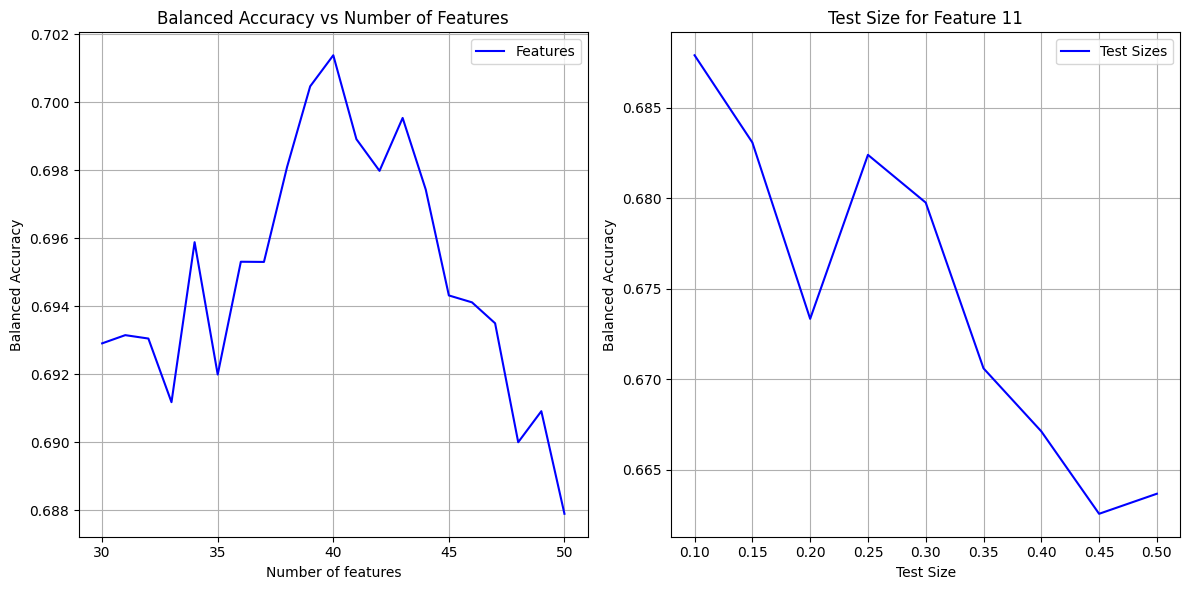

['27_TP7', '25_O2', '36_CP4', '15_CP5', '13_CP3', '13_F5', '13_CP2', '9_CZ', '12_T8', '14_P2', '13_FC2', '14_O2', '14_C6', '15_FCZ', '13_O1', '26_POZ', '27_T7', '27_PO5', '17_FCZ', '13_FT8', '15_O1', '33_CP4', '27_AF4', '14_F7', '12_T7', '25_CP3', '27_P5', '14_PZ', '8_FC2', '28_F7', '21_PO5', '26_P2', '27_P8', '9_FCZ', '12_F8', '10_T7', '19_F3', '35_CZ', '27_CP5', '8_FCZ']
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
File created and list stored successfully.


In [3]:
best_params= src.grid_search(X_all,Y)
n_feature, feature_df, clf, scaler=src.best_n_features(X_all,Y,best_params)
best_all_features=feature_df.columns.tolist()
print(best_all_features)
print(best_params)

if os.path.exists('best_all_features1.txt'):
    os.remove('best_all_features1.txt')
with open('best_all_features1.txt', 'w') as file:
    file.write(', '.join(best_all_features))
print("File created and list stored successfully.")

In [5]:
import pandas as pd
import numpy as np
import src.functions as src
from sklearn.svm import SVC

features = "dataset2_features.csv"
features = pd.read_csv(features, sep=',', header=0, index_col=None)
Y = features[['labels']]

X_all1 = features.drop('labels', axis=1)
all_pre= ['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_','25_','26_','27_','28_','29_','30_','33_','34_']
X_all_pre=X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in all_pre)]]
all_post=  ['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_','19_','20_','21_','22_','23_','24_','31_','32_','35_','36_']
X_all_post=X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in all_post)]]
print('All Features:')
print('Total: ' + str(len(X_all.columns))) 
print('Pre: ' + str(len(X_all_pre.columns)))
print('Post: ' + str(len(X_all_post.columns)))

theta_prefixes= ['1_','2_','3_','4_','5_','6_','7_','8_','9_','10_','11_','12_','13_','14_','15_','16_','17_','18_']
X_theta= X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in theta_prefixes)]]
theta_pre= ['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_']
X_theta_pre= X_theta[[col for col in X_theta.columns if any(col.startswith(prefix) for prefix in theta_pre)]]
theta_post= ['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_']
X_theta_post= X_theta[[col for col in X_theta.columns if any(col.startswith(prefix) for prefix in theta_post)]]
print('Theta Features:')
print('Total: ' + str(len(X_theta.columns)))
print('Pre: ' + str(len(X_theta_pre.columns)))
print('Post: ' + str(len(X_theta_post.columns)))

frequency_prefixes= ['1_','2_','3_','4_','5_','6_','7_','8_','9_','10_','11_','12_','13_','14_','15_','16_','17_','18_','19_','20_','21_','22_','23_','24_','25_','26_','27_','28_','29_','30_']
X_frequency= X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in frequency_prefixes)]]
frequency_pre=['3_','4_','6_','7_','10_','11_','12_','15_','16_','18_','25_','26_','27_','28_','29_','30_']
X_frequency_pre= X_frequency[[col for col in X_frequency.columns if any(col.startswith(prefix) for prefix in frequency_pre)]]
frequency_post=['1_','2_','5_','7_','8_','9_','12_','13_','14_','17_','19_','20_','21_','22_','23_','24_']
X_frequency_post= X_frequency[[col for col in X_frequency.columns if any(col.startswith(prefix) for prefix in frequency_post)]]
print('Frequency Features:')
print('Total: ' + str(len(X_frequency.columns)))
print('Pre: ' + str(len(X_frequency_pre.columns)))
print('Post: ' + str(len(X_frequency_post.columns)))

temporal_prefixes= ['31_','32_','33_','34_','35_','36_']
X_temporal= X_all[[col for col in X_all.columns if any(col.startswith(prefix) for prefix in temporal_prefixes)]]
temporal_pre= ['33_','34_']
X_temporal_pre= X_temporal[[col for col in X_temporal.columns if any(col.startswith(prefix) for prefix in temporal_pre)]] 
temporal_post= ['31_','32_','35_','36_']
X_temporal_post= X_temporal[[col for col in X_temporal.columns if any(col.startswith(prefix) for prefix in temporal_post)]]
print('Temporal Features:')
print('Total: ' + str(len(X_temporal.columns)))
print('Pre: ' + str(len(X_temporal_pre.columns)))
print('Post: ' + str(len(X_temporal_post.columns)))

All Features:
Total: 1549
Pre: 804
Post: 806
Theta Features:
Total: 587
Pre: 324
Post: 324
Frequency Features:
Total: 1307
Pre: 684
Post: 684
Temporal Features:
Total: 242
Pre: 120
Post: 122


In [6]:
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

def test_on_second_dataset(X_test_2, Y_test_2, trained_clf, trained_scaler):
    # Standardize the second dataset using the scaler from the training step
    X_test_2_scaled = trained_scaler.transform(X_test_2)
    
    # Predict the labels for the second dataset
    Y_pred_2 = trained_clf.predict(X_test_2_scaled)
    
    # Predict the probabilities for the second dataset (optional, if you need probabilities)
    Y_pred_prob_2 = trained_clf.predict_proba(X_test_2_scaled)[:, 1]
    
    # Calculate the balanced accuracy
    bal_acc_2 = balanced_accuracy_score(Y_test_2, Y_pred_2)
    
    # Calculate other metrics as needed
    f1 = f1_score(Y_test_2, Y_pred_2)
    precision = precision_score(Y_test_2, Y_pred_2)
    recall = recall_score(Y_test_2, Y_pred_2)
    roc_auc = roc_auc_score(Y_test_2, Y_pred_prob_2)
    
    # Print the results
    print("Balanced Accuracy on second dataset: {:.4f}".format(bal_acc_2))
    print("F1 Score: {:.4f}".format(f1))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("ROC AUC Score: {:.4f}".format(roc_auc))
    
    return Y_pred_2, Y_pred_prob_2, bal_acc_2


# Assuming trained_clf and trained_scaler are your trained classifier and scaler respectively
Y_pred_2, Y_pred_prob_2, bal_acc_2 = test_on_second_dataset(X_all1[best_all_features], Y, clf, scaler)


Balanced Accuracy on second dataset: 0.5439
F1 Score: 0.2473
Precision: 0.2368
Recall: 0.2587
ROC AUC Score: 0.5677


## Test Set

### Theta Features

In [ ]:
with open('best_theta_features.txt', 'r') as file:
    best_theta_features = file.read().split(', ')
params= {'kernel': 'rbf'}
test_size=0.1
X= X_theta[best_theta_features]
print(best_theta_features)
bal_acc=src.classification(len(best_theta_features),X,Y, params,test_size)

### Frequency Features

In [ ]:
with open('best_frequency_features.txt', 'r') as file:
    best_frequency_features = file.read().split(', ')
params= {'kernel': 'rbf'}
test_size=0.1
X= X_frequency[best_frequency_features]
print(best_frequency_features)
bal_acc=src.classification(len(best_frequency_features),X,Y, params,test_size)

### Temporal Features

In [ ]:
with open('best_temporal_features.txt', 'r') as file:
    best_temporal_features = file.read().split(', ')
params= {'kernel': 'rbf'}
test_size=0.1
X= X_temporal[best_temporal_features]
print(best_temporal_features)
bal_acc=src.classification(len(best_temporal_features),X,Y, params,test_size)

### All Features

In [8]:
with open('best_all_features2.txt', 'r') as file:
    best_all_features = file.read().split(', ')
params= src.grid_search(X_all,Y)
test_size=0.1
X= X_all[best_all_features]
print(params)
print(best_all_features)
bal_acc=src.classification(len(best_all_features),X,Y, params,test_size)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
['1_data', '11_FT8', '33_TP7', '13_CP3', '10_P4', '15_PO4', '12_F4', '35_C3', '17_F3', '21_CZ', '13_AF3', '12_F1', '33_CZ', '12_F8', '8_F1', '34_F4', '27_P5', '12_AF3', '35_CPZ', '7_data', '20_F8', '33_FCZ', '12_F3', '8_F3', '10_C5', '8_FCZ', '27_P4', '35_OZ']
Number of features used: 28
Mean Sensitivity: 0.5753
Std Sensitivity: 0.1219
Mean Specificity: 0.7068
Std Specificity: 0.0298
Mean Balanced Accuracy: 0.6411
Std Balanced Accuracy: 0.0604


In [ ]:
from sklearn.feature_selection import SelectKBest
params=src.grid_search(X_all,Y)
print(params)
selector= SelectKBest(k=40) #test_size=0.1
X_new= selector.fit_transform(X_all,Y)
X_new= X_all.columns[selector.get_support()].tolist()
test_size=0.05
while test_size<=0.5:
    print('Test_size: {:.2f}'.format(test_size))
    src.classification(len(X_new),X_all[X_new],Y, params,test_size)
    test_size+=0.05
print(X_new)
print('--------------------------------------------------------------------------------------------------------------------------')

from mrmr import mrmr_classif
X_new= mrmr_classif(X_all,Y,40)
test_size=0.05
while test_size<=0.5:
    print('Test_size: {:.2f}'.format(test_size))
    src.classification(len(X_new),X_all[X_new],Y, params,test_size)
    test_size+=0.05
print(X_new)
print('--------------------------------------------------------------------------------------------------------------------------')

X_new= src.camila_feat_selection(X_all,Y)
test_size=0.05
while test_size<=0.5:
    print('Test_size: {:.2f}'.format(test_size))
    src.classification(len(X_new),X_all[X_new],Y, params,test_size)
    test_size+=0.05
print(X_new)

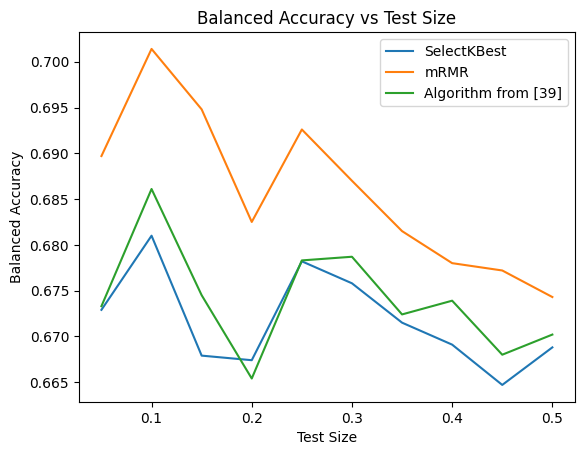

In [23]:
x=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
yklearn= [0.6729, 0.6810, 0.6679,0.6674,0.6782,0.6758,0.6715,0.6691,0.6647,0.6688]
ymrmr= [0.6897,0.7014,0.6948,0.6825,0.6926,0.6870,0.6815,0.6780,0.6772,0.6743]
ycamila= [0.6733,0.6861,0.6745,0.6654,0.6783,0.6787,0.6724,0.6739,0.6680,0.6702]

import matplotlib.pyplot as plt
plt.plot(x,yklearn, label='SelectKBest')
plt.plot(x,ymrmr, label='mRMR')
plt.plot(x,ycamila, label='Algorithm from [39]')
plt.xlabel('Test Size')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy vs Test Size')
plt.legend()
plt.show()